<a href="https://colab.research.google.com/github/Rukawe/Predicciones-de-Ventas/blob/main/Predicciones_de_Ventas_parte_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
filename = "/content/sales_predictions.csv"
df = pd.read_csv(filename)
df.tail(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [2]:
df.shape # Cantidad de filas y columnas

(8523, 12)

In [3]:
df.dtypes # Tipo de datos en cada columna

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
duplicados = df.duplicated == True
duplicados # No hay datos duplicados

False

In [5]:
df.isna().sum() # Se identifican los valores faltantes (4)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df['Item_Weight'].describe() # valores estadisticos de la columna 'Item_Weight'

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [7]:
moda = df['Item_Weight'].mode() # Valor de moda de la columna
moda

0    12.15
Name: Item_Weight, dtype: float64

In [8]:
weight = df['Item_Weight'].median() # Valor de mediana de la columna
weight

12.6

In [9]:
df['Item_Weight'].fillna(weight, inplace = True) # Se utiliza finalmente la mediana para rellenar los datos faltantes, ya que es un valor que está cerca de la moda (mayor a este valor), pero a la vez, cerca del promedio (menor a este valor). 

In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df['Item_Weight'].head(10)

0     9.300
1     5.920
2    17.500
3    19.200
4     8.930
5    10.395
6    13.650
7    12.600
8    16.200
9    19.200
Name: Item_Weight, dtype: float64

In [12]:
df['Outlet_Size'].isna().sum() #cantidad de datos faltantes en la columna

2410

In [13]:
df['Outlet_Size'].value_counts() # En este caso son valores categóricos, se debe tomar en cuenta para el reemplazo de valores

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
df['Outlet_Size'].fillna('Undefined', inplace=True) #Se reemplazará como 'Undefined' para el valor faltante en esta columna
df.head(100)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Undefined,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
95,FDU04,12.60,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
96,FDF41,12.15,Low Fat,0.131384,Frozen Foods,246.0460,OUT049,1999,Medium,Tier 1,Supermarket Type1,1231.7300
97,FDB56,8.75,Regular,0.074613,Fruits and Vegetables,187.4556,OUT035,2004,Small,Tier 2,Supermarket Type1,3755.1120
98,NCP18,12.60,Low Fat,0.028460,Household,149.9708,OUT027,1985,Medium,Tier 3,Supermarket Type3,4363.6532


In [15]:
df['Outlet_Size'].value_counts()

Medium       2793
Undefined    2410
Small        2388
High          932
Name: Outlet_Size, dtype: int64

In [16]:
df.isna().sum() # Ya no hay valores sin nombres en las columnas

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df['Item_Fat_Content'].value_counts() #Acá se presentan datos con nombres que no corresponden (LF,reg,low fat)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [19]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [20]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')

In [21]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [22]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat') # Se cambian todas las insconsistencias

In [23]:
df.describe().round(2) # Con esta función solo se consideran los datos númericos de las columnas que correspondan

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.81,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [24]:
df.shape

(8523, 12)

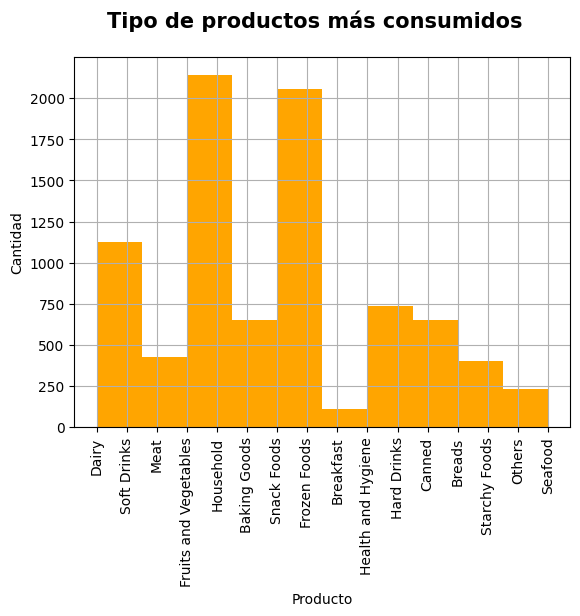

In [25]:
fig = plt.figure(dpi=100)
fig.suptitle('Tipo de productos más consumidos', fontsize=15, fontweight="bold")
df['Item_Type'].hist(color='orange')
plt.xticks(rotation = 90)
plt.xlabel('Producto')
plt.ylabel('Cantidad');

Antes pudimos ver los datos relacionados a cada uno de los productos, y la cantidad consumida de cada uno. Con los gráficos nos damos cuenta rapidamente que los productos más consumidos son las Frutas y Vegetales (como el producto más consumido) y los Snack. Le siguen productos familiares y comida congelada. 
Quizás no se ve una tendencia clara solo con este dato para saber sobre los hpabitos de consumo de los clientes de los supermercados, pero si podemos decir que el pdroucto estrella actualmente son frutas y vegetales. Dato que podría aprovecharse.

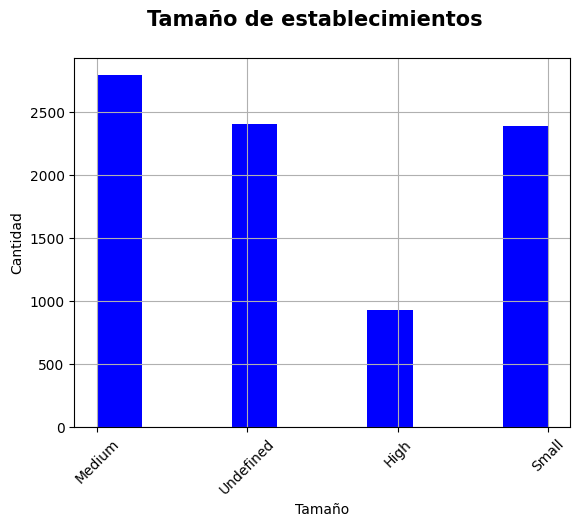

In [26]:
fig = plt.figure(dpi=100)
fig.suptitle('Tamaño de establecimientos', fontsize=15, fontweight="bold")
df['Outlet_Size'].hist(color='blue')
plt.xticks(rotation = 45)
plt.xlabel('Tamaño')
plt.ylabel('Cantidad');

Viendo este gráfico podemos concluir que la cadena de supermercados no se perfila como una cadena con supermercados con establecimientos de gran tamaño (megamercados), sino que cuenta con una gran cantidad de establecimientos medianos, pequeños e indefinidos. 

Text(0.5, 0.98, '')

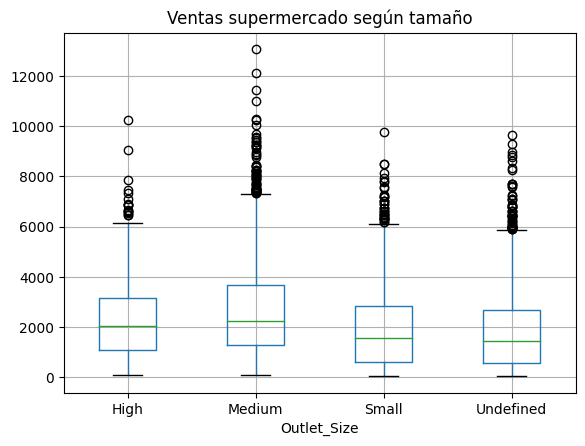

In [27]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Size')
plt.title('Ventas supermercado según tamaño');
plt.suptitle('')

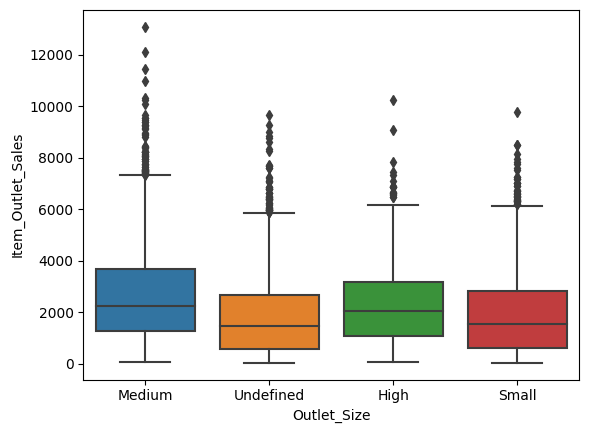

In [28]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df);

En ambos gráficos podemos ver los mismo, nada más que uno con estilo Matplotlib, y el otro con estilo Seaborn. Podemos ver que los valores en los establecimientos medianos son los que más llaman la atención: la mediana más alta está en la venta de supermercados medianos, al igual que los valores máximos. Los valores atipicos se van alejando incluso en mayor medida en los establecimientos medianos. Los establecimientos de este tamaño (medianos) son los tipos de establecimientos"fuertes" en esta cadena de supermercados.

In [29]:
corr = df.corr() #Función para generar la correlación entre variables (columnas)

<ipython-input-29-85265a0307fe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr() #Función para generar la correlación entre variables (columnas)


<Axes: >

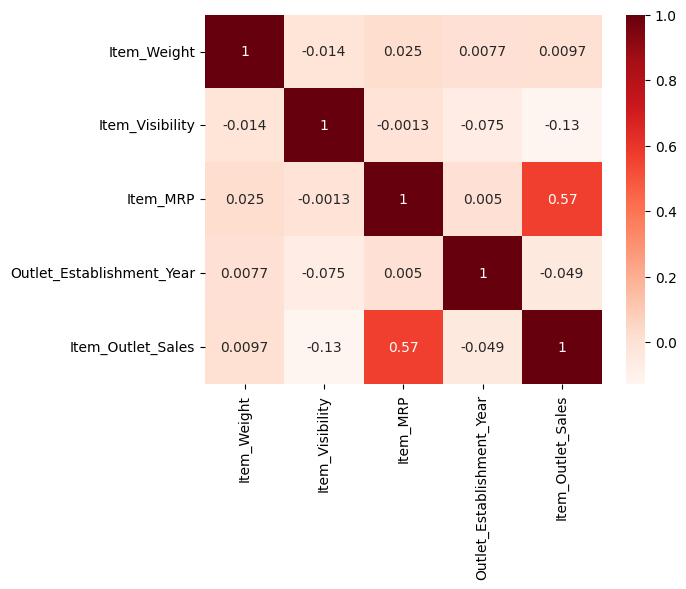

In [30]:
sns.heatmap(corr, cmap = 'Reds', annot = True)

Se ve una correlación positiva moderada (de 0,57) entre "Item MRP" e "Item Outlet Sales" (la más fuerte en esta matriz). MRP se refiere a la planificación de requerimientos de los materiales que se van a necesitar en un determinado período de tiempo (en el establecimiento que se esté revisando). Existe una correlación ya que dependiendo de cuanto se venda en el local, se deberá realizar un aumento o disminución de materiales a adquirir. Una ejemplo de esto sería si existen muchas ventas en un establecimiento, conllevará a que deban comprarse nuevos productos para reabastecer el local y así no disminuyan las ventas.

In [32]:
import matplotlib.pyplot as plt

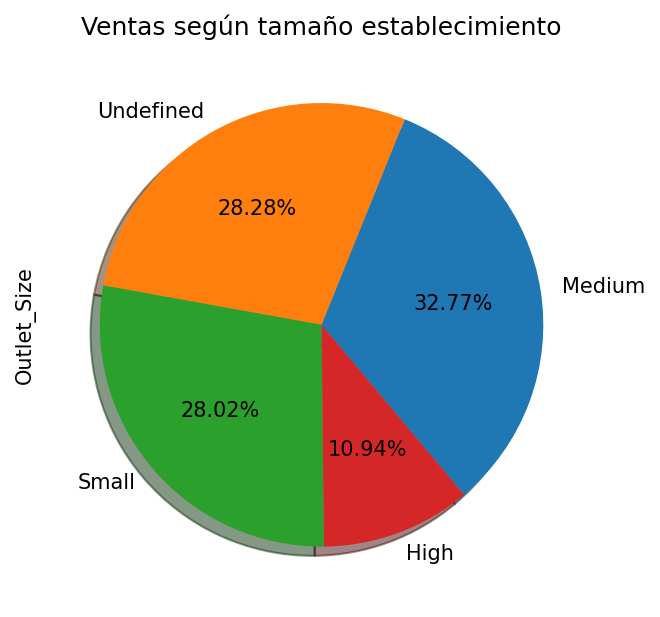

In [40]:
plt.figure(dpi=150)
df['Outlet_Size'].value_counts().plot.pie(autopct="%1.2f%%", shadow=True, startangle=-50)
plt.title("Ventas según tamaño establecimiento")
plt.show()

Se aprecia claramente el porcentaje de ventas según local. Destaca con un 32% las ventas en locales de tamaño medio. Le siguen "Small" y "Undefined" con 28%. Muy lejos queda las ventas en los locales grandes, con solo un 10% de las ventas totales.

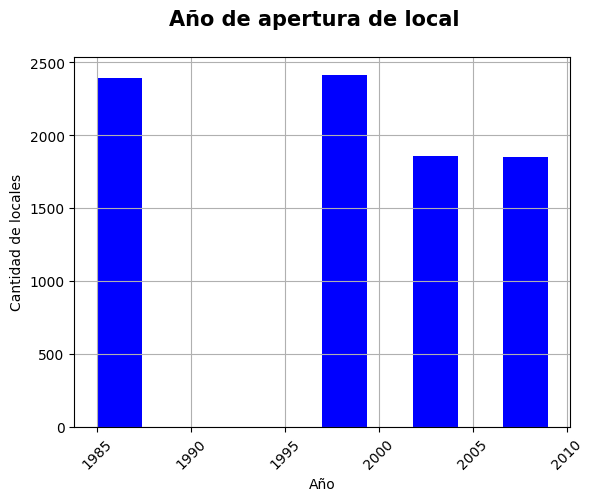

In [54]:
fig = plt.figure(dpi=100)
fig.suptitle('Año de apertura de local', fontsize=15, fontweight="bold")
df['Outlet_Establishment_Year'].hist(color='blue')
plt.xticks(rotation = 45)
plt.xlabel('Año')
plt.ylabel('Cantidad de locales');